<a href="https://colab.research.google.com/github/arthurnonaka/goalpost_detection/blob/master/goalpost_detection_yolo_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#TREINAMENTO DE REDES NEURAIS CONVOLUCIONAIS PARA DETECÇÃO DE TRAVES DE FUTEBOL

O objetivo desse Notebook é oferecer ao usuário uma forma prática e fácil de treinar uma rede neural convolucional para detecção de objetos, o intuito é que com algumas alterações e inserindo as imagens juntamente com as labels o treinamento seja executado em um só lugar.

O modelo pre treinado escolhido para esse notebook foi o Yolo_V3


###Connect to the Google Drive

Aqui estaremos conectando o notebook do Google Colab ao nosso Drive, para que ele tenha acesso aos nossos arquivos e parâmetros de configuração. Será necessário um código de permissão que pode ser obtido no link que vai ser gerado.

In [ ]:
from os.path import join
from google.colab import drive
 
ROOT = "/content/drive"
drive.mount(ROOT)
 
PROJ = "My Drive/goalpost_detection_master/yolov3" # This is a custom path.
PROJECT_PATH = join(ROOT, PROJ)
 
%cd ~/content
%cd drive/My Drive/goalpost_detection_master/yolov3


Mounted at /content/drive
[Errno 2] No such file or directory: '/root/content'
/content
/content/drive/My Drive/goalpost_detection_master/yolov3


### Clone repository

In [ ]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 9377, done.
remote: Total 9377 (delta 0), reused 0 (delta 0), pack-reused 9377
Receiving objects: 100% (9377/9377), 7.79 MiB | 7.30 MiB/s, done.
Resolving deltas: 100% (6440/6440), done.


In [ ]:
!pip install -U -r requirements.txt

  Cloning https://github.com/cocodataset/cocoapi.git to /tmp/pip-req-build-gr04msa7
  Running command git clone -q https://github.com/cocodataset/cocoapi.git /tmp/pip-req-build-gr04msa7
Requirement already up-to-date: Cython in /usr/local/lib/python3.6/dist-packages (from -r requirements.txt (line 2)) (0.29.21)
     |████████████████████████████████| 20.4MB 1.4MB/s 
     |████████████████████████████████| 43.7MB 65kB/s 
     |████████████████████████████████| 748.8MB 23kB/s 
     |████████████████████████████████| 11.5MB 52.4MB/s 
     |████████████████████████████████| 2.2MB 45.1MB/s 
     |████████████████████████████████| 6.8MB 47.8MB/s 
     |████████████████████████████████| 5.9MB 43.5MB/s 
     |████████████████████████████████| 25.9MB 117kB/s 
     |████████████████████████████████| 71kB 9.7MB/s 
  Created wheel for pycocotools: filename=pycocotools-2.0-cp36-cp36m-linux_x86_64.whl size=266459 sha256=9db8105d61ebccf0977517a5f59032eda3df39e3b2ff68b552a8fe1ad375cb64
  Stored in dir

##Executing object detection training script

Chegamos na parte prática do notebook que envolve treinar a rede neural e depois gerar o frozen graph para testar os resultados. 
Abaixo se encontram algumas informações da fonte do script utilizado para realizar o treinamento, com os parâmetros utilizados e a forma de compilar.

###Training the Neural Network

Esse passo pode demorar algumas horas ou até dias dependendo dos parâmetros escolhidos.
DICA: caso queira um treinamento mais rápido deve-se diminuir o Batch size, e o número de steps, esses dois parâmetros estão localizados em:
""

In [ ]:
import torch
torch.cuda.empty_cache()

In [ ]:
%cd ~
%cd /content
%cd drive/My Drive/goalpost_detection_master/yolov3/
!python3 train.py --data data/goalpost.data --cfg cfg/yolov3.cfg --weights weights/yolov3.pt --epochs 150 --batch-size 24 --freeze-layers --resume --nosave

/root
/content
/content/drive/My Drive/goalpost_detection_master/yolov3
Apex recommended for faster mixed precision training: https://github.com/NVIDIA/apex
Your branch is behind 'origin/master' by 88 commits, and can be fast-forwarded.
  (use "git pull" to update your local branch)

Namespace(adam=False, batch_size=24, bucket='', cache_images=False, cfg='cfg/yolov3.cfg', data='data/goalpost.data', device='', epochs=150, evolve=False, freeze_layers=True, img_size=[320, 640], multi_scale=False, name='', nosave=True, notest=False, rect=False, resume=True, single_cls=False, weights='weights/yolov3.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Start Tensorboard with "tensorboard --logdir=runs", view at http://localhost:6006/
2021-08-14 20:17:52.081860: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
Optimizer 

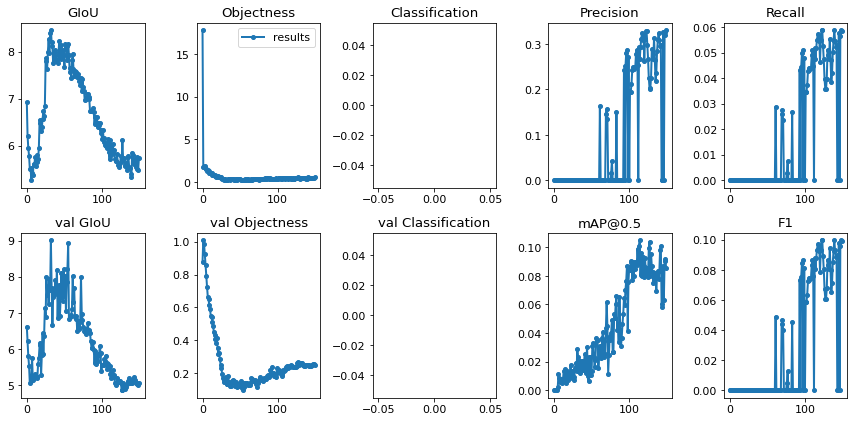

In [ ]:
from utils import utils

utils.plot_results()

In [ ]:
%cd ~
%cd /content
%cd drive/My Drive/goalpost_detection_master/yolov3/
!python detect.py --weights 'weights/last.pt' --source ../test_images --output ./output/150/validation --cfg 'cfg/yolov3.cfg' --names 'data/goalpost.names'

/root
/content
/content/drive/My Drive/goalpost_detection_master/yolov3
Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/goalpost.names', output='./output/500/validation', save_txt=False, source='../test_images', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
image 1/13 ../test_images/test_10.png: 384x512 Done. (0.033s)
image 2/13 ../test_images/test_11.png: 320x512 Done. (0.029s)
image 3/13 ../test_images/test_12.png: 320x512 Done. (0.029s)
image 4/13 ../test_images/test_13.png: 384x512 Done. (0.033s)
image 5/13 ../test_images/test_14.png: 384x512 Done. (0.033s)
image 6/13 ../test_images/test_15.png: 384x512 Done. (0.033s)
image 7/13 ../test_images/test_16.png: 384x512 Done. (0.033s)
image 8/13 ../test_images/tes

In [ ]:
!python detect.py --weights 'weights/last.pt' --output ./output/150/test/ --source ../test_video/goalpost_test_1.mp4 --cfg 'cfg/yolov3.cfg' --names 'data/goalpost.names'

Namespace(agnostic_nms=False, augment=False, cfg='cfg/yolov3.cfg', classes=None, conf_thres=0.3, device='', fourcc='mp4v', half=False, img_size=512, iou_thres=0.6, names='data/goalpost.names', output='./output/150/test/', save_txt=False, source='../test_video/goalpost_test_1.mp4', view_img=False, weights='weights/last.pt')
Using CUDA device0 _CudaDeviceProperties(name='Tesla T4', total_memory=15109MB)

Model Summary: 222 layers, 6.15237e+07 parameters, 6.15237e+07 gradients
video 1/1 (1/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.036s)
video 1/1 (2/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.030s)
video 1/1 (3/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.030s)
video 1/1 (4/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.030s)
video 1/1 (5/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.030s)
video 1/1 (6/1814) ../test_video/goalpost_test_1.mp4: 384x512 Done. (0.030s)
video 1/1 (7/1814) ../test_video/goalpost_test_1.mp4: 384x5